In [1]:
import pandas as pd
import numpy as np
import matplotlib
import json
from pandas import json_normalize
from IPython.display import display

### Loading the data

In [2]:
data = pd.read_csv('../../data/healthtap_full_processed.csv')

In [3]:
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287925 entries, 0 to 2287924
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   doctor_name        object
 1   doctor_profession  object
 2   short_answer       object
 3   answer             object
 4   main_category      object
 5   question           object
 6   related_topics     object
 7   sub_category       object
dtypes: object(8)
memory usage: 139.6+ MB


### Main category

In [5]:
data['main_category'].describe()

count     2287925
unique        227
top         drugs
freq       120024
Name: main_category, dtype: object

In [6]:
data['main_category'].unique()

array(['vagina', 'video game', 'viral infection', 'vitamins', 'weigh',
       'weight gain', 'uterus', 'vaccines', 'weight loss', 'went er',
       'bumps', 'burn', 'burning sensation', 'cancer',
       'carbidopa levodopa', 'carpal tunnel', 'cesarean section',
       'charley horse', 'chest', 'chest pain', 'child',
       'chronic fatigue syndrome', 'chronic pain', 'cold', 'cold sore',
       'concussion', 'connective tissue', 'contact lens', 'contraception',
       'coumadin warfarin', 'cracking knuckle', 'creams', 'ct scan',
       'cure', 'cut', 'cysts', 'delay period', 'dementia', 'depression',
       'dextroamphetamine racemic amphetamine', 'diabetes',
       'diagnostic test', 'diets', 'disabilities', 'disorders', 'drugs',
       'dry skin', 'ear infection', 'effect', 'enema',
       'estoy experimentando', 'exercise', 'eye', 'eyes', 'face',
       'family', 'fear management', 'feet', 'fever', 'flu', 'food safety',
       'foot pain', 'fungal infection', 'gall bladder', 'gas blo

### Histogram of top categories (count more than 10 000)

<AxesSubplot:>

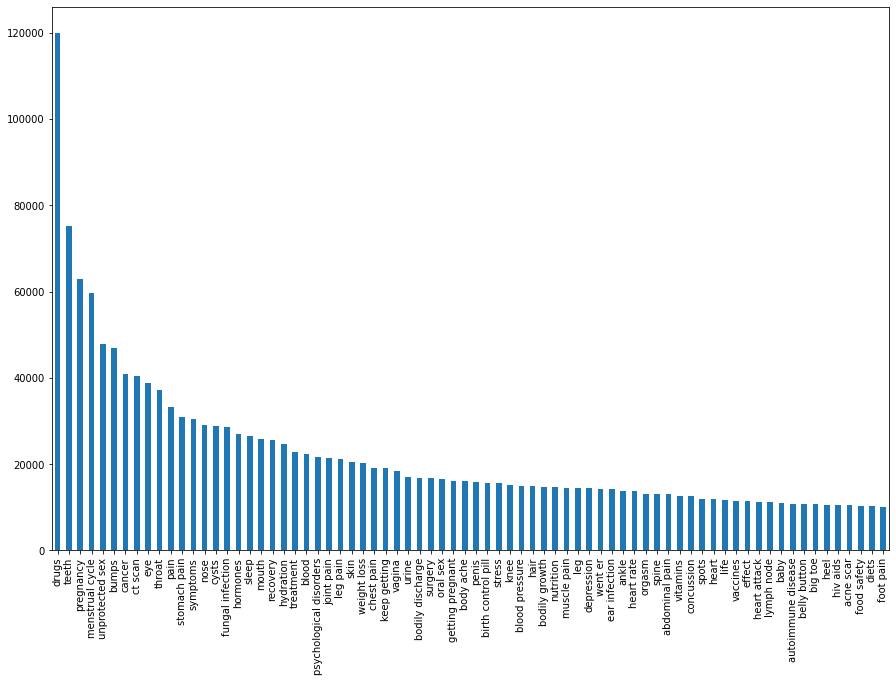

In [7]:
data['main_category'].value_counts().loc[lambda x: x > 10000].plot(kind="bar", figsize=(15,10))

### Other columns

In [8]:
data['doctor_name'].describe()

count              2287925
unique               40945
top       Dr. Heidi Fowler
freq                 72068
Name: doctor_name, dtype: object

In [9]:
data['doctor_profession'].describe()

count             2283931
unique              17431
top       Family Medicine
freq               224808
Name: doctor_profession, dtype: object

In [10]:
data['sub_category'].describe()

count                 2287925
unique                   5048
top       high blood pressure
freq                    12092
Name: sub_category, dtype: object

### Count number of words in questions and answers and assign it to new columns

In [11]:
data['question_len'] = data['question'].str.split().apply(len)
data['answer_len'] = data['answer'].str.split().apply(len)

In [12]:
pd.set_option('float_format', '{:f}'.format)
display(data['question_len'].describe())
display(data['answer_len'].describe())

count   2287925.000000
mean         18.562765
std           9.430023
min           1.000000
25%          10.000000
50%          17.000000
75%          26.000000
max          65.000000
Name: question_len, dtype: float64

count   2287925.000000
mean         40.386308
std          22.666927
min           1.000000
25%          22.000000
50%          39.000000
75%          58.000000
max        1819.000000
Name: answer_len, dtype: float64

### Question length diagram

<AxesSubplot:>

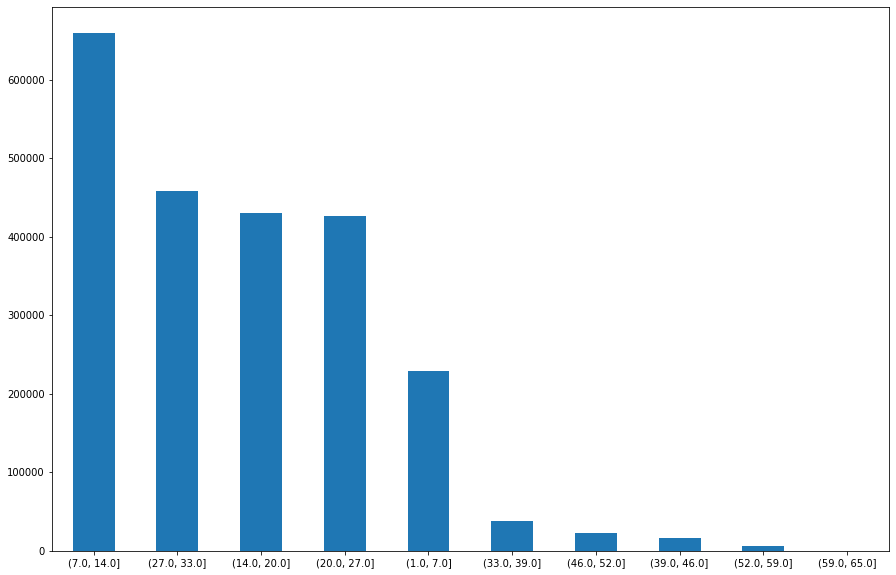

In [13]:
data['question_len_group'] = pd.cut(data['question_len'], bins=10, precision=0)
pd.value_counts(data['question_len_group']).plot(kind="bar", figsize=(15,10), rot=0)

### Answer length diagram
We can observe that most answers have less than 100 words. We adjust the bin intervals according to this.

<AxesSubplot:>

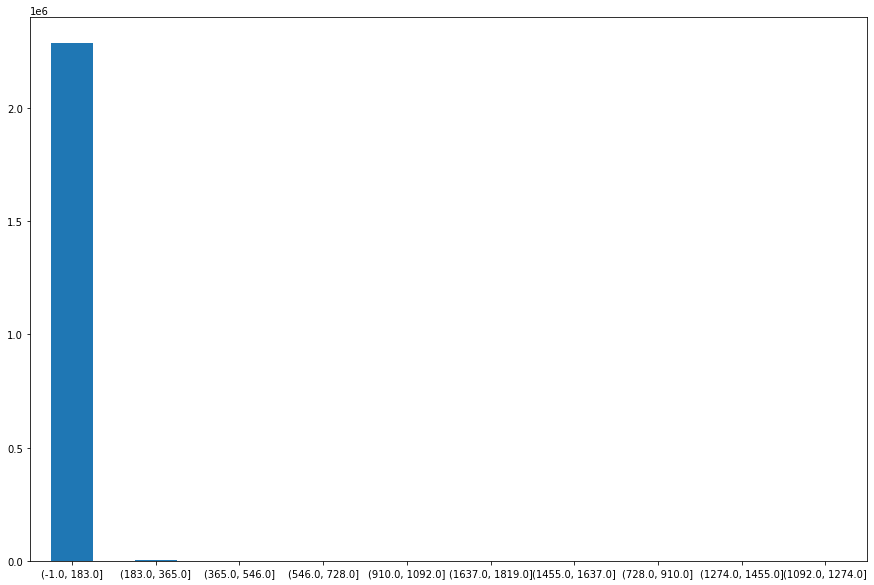

In [14]:
data['answer_len_group'] = pd.cut(data['answer_len'], bins=10, precision=0)
pd.value_counts(data['answer_len_group']).plot(kind="bar", figsize=(15,10), rot=0)

In [15]:
len(data[data['answer_len'] > 100])

9611

<AxesSubplot:>

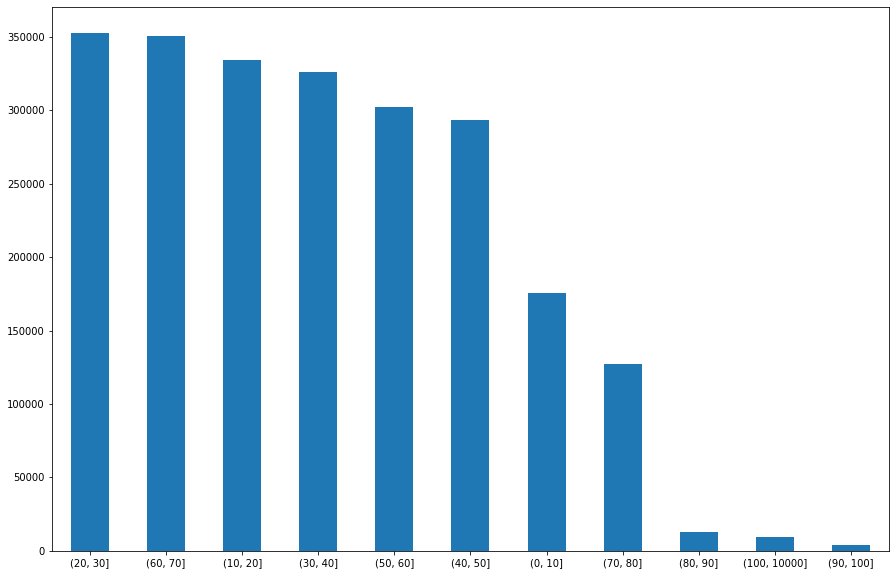

In [16]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10000]
data['answer_len_group'] = pd.cut(data['answer_len'], bins=bins, precision=0)
pd.value_counts(data['answer_len_group']).plot(kind="bar", figsize=(15,10), rot=0)

### Word frequency in questions and answers

<AxesSubplot:>

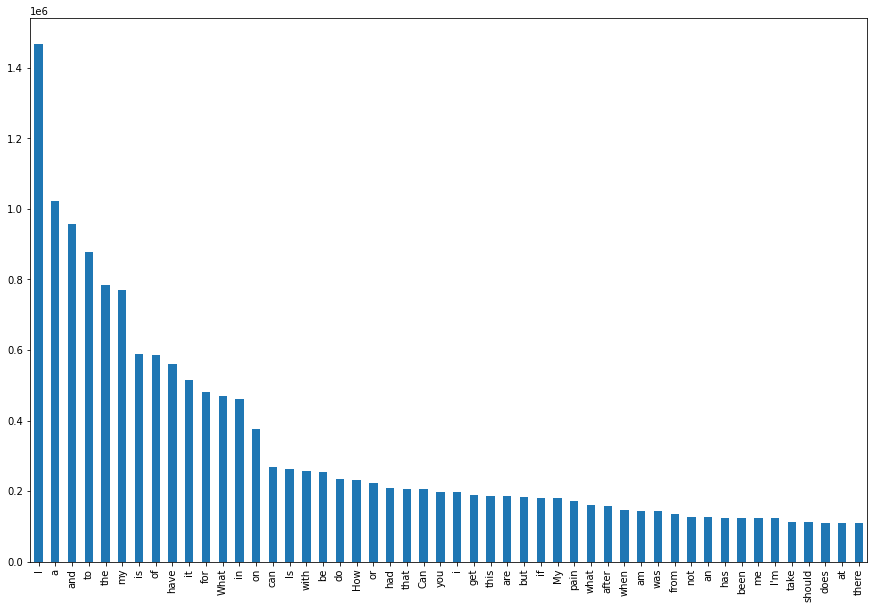

In [17]:
data.question.str.split(expand=True).stack().value_counts()[:50].plot(kind="bar", figsize=(15,10))

<AxesSubplot:>

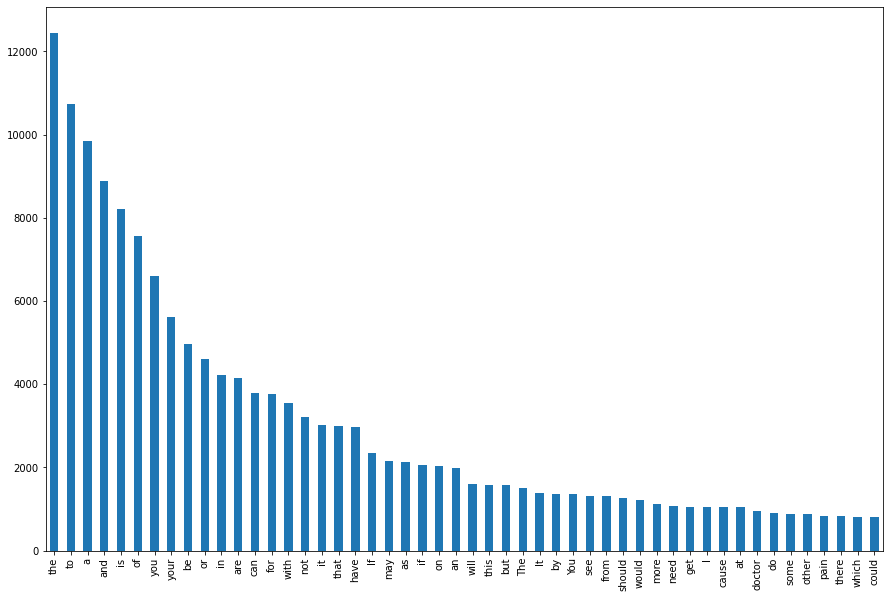

In [18]:
data.sample(n=10000).answer.str.split(expand=True).stack().value_counts()[:50].plot(kind="bar", figsize=(15,10))

In [19]:
pd.set_option('display.max_colwidth', None)
data.sample(n=50)[['question', 'answer']]

,question,answer
1163506,Any advice for podiatric students who are soon to be starting a practice?,"Make sure you spend time in the front offices of doctors you visit to get practice management tips, join aappm the are a great resource for help in practice. Make sure you have an attorney review any employment contract you are considering."
540105,I am getting pain on the back of my legs in the thighs. What is cause and best treatment for this condition?,"Hmm. If there is no injury it could be a muscle, ligament, tendon injury or bakers cyst. Blood clots are possible and would not need to be red swollen or painful. Best advice is get examined please."
1053867,"GP diagnosed me with viral respiratory infection yesterday. Have a fever, cough and mild sore throat. But my CBC was normal, how does that happen?",You don't necessarily have to have changes on CBC when you have a viral upper respiratory infection.
1937544,Can you wear contact lenses with a subconjunctival hemorrhage?,As long as the contact lens is comfortable.
1744753,Will strawberry flavored amoxicillin cause hives in a breastfed baby with a strawberry allergy? He has taken bubble gum one 2 times before no issue,"May be the baby is developing Amoxicillin allergy, or possibly strawberry related. Remember, somebody has to be exposed to an allergen initially to react to it on further exposure. With subsequent exposure, the allergic reaction becomes stronger and severe to become life threatening. Be careful next time, talk to baby's doctor."
1856641,Does otravin nasal puffs aggravates the lower esophagus spasm?,"Rarely it may cause nausea. What makes you think that you have esophageal spasms? Have you been diagnosed of it by gastroenterologist? If not, then see a physician for evaluation."
825756,Baby 7 months old&for the past month or so he moans&goes back&forth from his side to back when sleeping&this sometimes wakes him up. Teething symptom?,This is a common sleep pattern at that age. It is also the beginning of a period of separation anxiety that can account for night waking. Just be consistent and supportive. I don't buy the issue of teething.It gets blamed for just about anything at this age.
696635,My dentist says I have an infection in my gums. Could this be causing my headaches?,"If the infection in your gums is advanced enough to have caused an abscess or significant swelling around the tooth, the pain from it can give you headaches. However, this is something so obvious you probably don't need your dentist to tell you. In most cases, outside of swelling or looses teeth, periodontitis (gum disease) is normally not linked to headaches."
2001786,How do I get red of barthlolin cyst with out operation?,"If the gland is not infected or painful, then you probably do not need to have it drained or removed. If it is infected, then you need antibiotics and perhaps have the gland drained surgical or removed. You need to see your doctor if the gland is causing problems."
2257509,Sgot 22 and sgpt 32 I have RA and taking 15 mg of methotrexate every saturday and folic acid every sunday.. Should i be concerned about my liver?,"Methotrexate has many complications. It can affect the lung, liver, and bone marrow. Initial period required close monitoring for bone marrow suppression, liver injury. Previously, this medication was recommended to have periodic liver biopsy to assure patients can handle it. Nowadays, some questioned this approach. With periodic lft (liver lab work) and ultrasound might be sufficed."


In [21]:
data[data.main_category == 'vagina'][['question', 'answer']]

,question,answer
0,Like 5 yrs ago to now I've had some reoccurring itching and when I scratched some burning n vagina no pain never and never noticed sores..is it herpes?,"test to see if you are a carrier of herpes simplex. or see gynecologist or dermatologist when burning or itching starts, but would need to see lesions if possible. perhaps it could be a yeast infection which can be cultured"
1,My 6 year old daughter complains about vaginal itching and discomfort. We don't do bubble baths. What can I do for her?,Make sure she is not. Wearing tight fitting underwears or tight jeans. Cottons are better. You can try using vagisil powder to help vaginal itching.Hygiene is also very important.
2,My 6 year old daughter complains about vaginal itching and discomfort. We don't do bubble baths. What can I do for her?,Take her to a Gyn. Gynecologists are trained to perform vulvar or vaginal exams on children. Call your own gyn and see if she could do it or if she could refer you to a colleague who may have a special focus on pediatric gynecology.
3,My Friend is experiencing irritation and she said it's swollen down their she told me that she put a tampon with yogurt up and it swollen?,"Followup with doc. Some women use yoghurt as a home remedy for vaginitis. However as she is now having swelling in addition to irritation, she needs to follow up with a doctor. Also avoid douching and any other home remedies in her vagina."
4,My Friend is experiencing irritation and she said it's swollen down their she told me that she put a tampon with yogurt up and it swollen?,Worrisome. Sounds like a self treatment for vaginosis. There may be something in the yogurt that she is reacting to or the original problem may be getting worse.It may be a good idea to remove the tampon and rinse the area with a plain douche & schedule a visit with her doc soon.
...,...,...
2287871,I noticed 3 small painful ulcer bump on my labia major(only one side) &from yesterday its getting better but I have new one on my glans clitoris.?,Vulvar ulcers are often a symptom of genital herpes. Physical examination and a culture are necessary to confirm this.
2287872,I noticed 3 small painful ulcer bump on my labia major(only one side) &from yesterday its getting better but I have new one on my glans clitoris.?,Panty liners certainly can cause vulvar irritation and itching. Did you change brands recently? Herpes can start out as itchy blisters and usually turns into extremely painful ulcers when the blisters rupture. There is a blood test for herpes 1 and 2--both can cause ulcers. See your doctor asap to get a diagnosis.
2287897,Only one side of my vagina is swollen. What can cause this? How do I cure this?,There are small glands on either side of the vaginal opening called the bartholin glands. They can get infected and can be blocked resulting in swelling of one side or the other. Antibiotics and a procedure to open up this closed area is indicated.
2287898,Quick relief for swollen right side vaginal labia after rough sex I have been icing it?,Vaseline or zinc oxide cream may help. The ice is good too. This may take a few days to resolve completely but if it continues to get worse there might be a hematoma (bruise) that might need treatment. Under very unusual circumstances this may prevent you from emptying your bladder.


In [29]:
len(data[(data.answer_len < 30) & (data.question_len < 30)])

741062

In [35]:
short_data = data[(data.answer_len < 30) & (data.question_len < 30)]
short_data = short_data.drop(columns=['question_len', 'answer_len', 'question_len_group', 'answer_len_group', 'doctor_name', 'doctor_profession'])
short_data_sample = short_data.sample(n=100000)
short_data_sample.to_csv('../../data/healthtap_short_sample.csv')


In [36]:
short_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741062 entries, 1 to 2287919
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   short_answer    383349 non-null  object
 1   answer          741062 non-null  object
 2   main_category   741062 non-null  object
 3   question        741062 non-null  object
 4   related_topics  720171 non-null  object
 5   sub_category    741062 non-null  object
dtypes: object(6)
memory usage: 39.6+ MB
